In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.svm import SVC
# from sklearn import preprocessing, decomposition#, model_selection, metrics, pipeline
# from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from matplotlib import pyplot as plt
import time

In [2]:
# !pip install nltk

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
# sample = pd.read_csv('../input/sample_submission.csv')
train.head()

,ID,Text,label
0,tr_doc_1,Two German tourists have been found safe and w...,C1
1,tr_doc_2,ACT police have seized a rare drug during a ra...,C1
2,tr_doc_3,A 50-year-old Brisbane man has been charged wi...,C1
3,tr_doc_4,In-depth discussions are continuing to resolve...,C1
4,tr_doc_5,Homicide detectives are still questioning a ma...,C1


In [3]:
print(train.shape)
test.shape

(106445, 3)


(26610, 2)

The test set is about one fifth of the train set. Thus, in the later part, we are going to use 5 fold validation strategy to evaluate the model. Since I can not wait the model to run 5 times for 5 cross-validation result. I am going to split the train data by the ratio 8-2, which means 80% of train data is used for fitting a model and 20% will be used for validation.

In [4]:
train.shape

(106445, 3)

There are some errors in the train documents in which the length of text is less than 10 characters. It's up to you to determine how long a document is to be considered as an error such as length <= 10 or length <= 20, etc. In this notebook, I consider those document with the length less than 10 charaters as errors, but in my original notebook I only consider those with length less than 1 to be errors. And it turned out working better if we remove less errors. So i think we shouldn't remove too many errors from the train so the model can generalize better with test data. But in this case, I want to try something new, so let's go with length <= 10  

In [5]:
idx = []
for i in range(train.shape[0]):
    # print those docs with error
    if len(train.Text[i]) <= 10:
        print(train.iloc[i,:])
    else:
        idx.append(i)

ID       tr_doc_4236
Text               '
label             C1
Name: 4235, dtype: object
ID       tr_doc_4239
Text               '
label             C1
Name: 4238, dtype: object
ID       tr_doc_4266
Text               '
label             C1
Name: 4265, dtype: object
ID       tr_doc_8750
Text               '
label             C2
Name: 8749, dtype: object
ID       tr_doc_8757
Text               '
label             C2
Name: 8756, dtype: object
ID       tr_doc_8819
Text               '
label             C2
Name: 8818, dtype: object
ID       tr_doc_12639
Text         ABC News
label              C3
Name: 12638, dtype: object
ID       tr_doc_18394
Text                '
label              C4
Name: 18393, dtype: object
ID       tr_doc_18428
Text                '
label              C4
Name: 18427, dtype: object
ID       tr_doc_19021
Text                '
label              C5
Name: 19020, dtype: object
ID       tr_doc_22251
Text        ABC Sport
label              C5
Name: 22250, dtype: object
I

Name: 56095, dtype: object
ID       tr_doc_56237
Text        ABC Sport
label             C12
Name: 56236, dtype: object
ID       tr_doc_56307
Text        ABC Sport
label             C12
Name: 56306, dtype: object
ID       tr_doc_56319
Text        ABC Sport
label             C12
Name: 56318, dtype: object
ID       tr_doc_56328
Text        ABC Sport
label             C12
Name: 56327, dtype: object
ID       tr_doc_56333
Text        ABC Sport
label             C12
Name: 56332, dtype: object
ID       tr_doc_56336
Text        ABC Sport
label             C12
Name: 56335, dtype: object
ID       tr_doc_56338
Text        ABC Sport
label             C12
Name: 56337, dtype: object
ID       tr_doc_56345
Text        ABC Sport
label             C12
Name: 56344, dtype: object
ID       tr_doc_66801
Text                '
label             C15
Name: 66800, dtype: object
ID       tr_doc_70788
Text                '
label             C16
Name: 70787, dtype: object
ID       tr_doc_70790
Text         ABC News

Name: 71812, dtype: object
ID       tr_doc_71814
Text         ABC News
label             C16
Name: 71813, dtype: object
ID       tr_doc_71815
Text         ABC News
label             C16
Name: 71814, dtype: object
ID       tr_doc_71817
Text         ABC News
label             C16
Name: 71816, dtype: object
ID       tr_doc_71818
Text         ABC News
label             C16
Name: 71817, dtype: object
ID       tr_doc_71819
Text         ABC News
label             C16
Name: 71818, dtype: object
ID       tr_doc_71820
Text         ABC News
label             C16
Name: 71819, dtype: object
ID       tr_doc_71824
Text         ABC News
label             C16
Name: 71823, dtype: object
ID       tr_doc_71826
Text         ABC News
label             C16
Name: 71825, dtype: object
ID       tr_doc_71828
Text         ABC News
label             C16
Name: 71827, dtype: object
ID       tr_doc_71829
Text         ABC News
label             C16
Name: 71828, dtype: object
ID       tr_doc_71831
Text         ABC News

Name: 71918, dtype: object
ID       tr_doc_71921
Text         ABC News
label             C16
Name: 71920, dtype: object
ID       tr_doc_71922
Text         ABC News
label             C16
Name: 71921, dtype: object
ID       tr_doc_71923
Text         ABC News
label             C16
Name: 71922, dtype: object
ID       tr_doc_71924
Text         ABC News
label             C16
Name: 71923, dtype: object
ID       tr_doc_71925
Text         ABC News
label             C16
Name: 71924, dtype: object
ID       tr_doc_71926
Text         ABC News
label             C16
Name: 71925, dtype: object
ID       tr_doc_71927
Text         ABC News
label             C16
Name: 71926, dtype: object
ID       tr_doc_71928
Text         ABC News
label             C16
Name: 71927, dtype: object
ID       tr_doc_71929
Text         ABC News
label             C16
Name: 71928, dtype: object
ID       tr_doc_71930
Text         ABC News
label             C16
Name: 71929, dtype: object
ID       tr_doc_71931
Text         ABC News

Name: 72026, dtype: object
ID       tr_doc_72029
Text         ABC News
label             C16
Name: 72028, dtype: object
ID       tr_doc_72030
Text         ABC News
label             C16
Name: 72029, dtype: object
ID       tr_doc_72031
Text         ABC News
label             C16
Name: 72030, dtype: object
ID       tr_doc_72033
Text         ABC News
label             C16
Name: 72032, dtype: object
ID       tr_doc_72034
Text         ABC News
label             C16
Name: 72033, dtype: object
ID       tr_doc_72035
Text         ABC News
label             C16
Name: 72034, dtype: object
ID       tr_doc_72036
Text         ABC News
label             C16
Name: 72035, dtype: object
ID       tr_doc_72037
Text         ABC News
label             C16
Name: 72036, dtype: object
ID       tr_doc_72038
Text         ABC News
label             C16
Name: 72037, dtype: object
ID       tr_doc_72039
Text         ABC News
label             C16
Name: 72038, dtype: object
ID       tr_doc_72040
Text         ABC News

Name: 72132, dtype: object
ID       tr_doc_72134
Text         ABC News
label             C16
Name: 72133, dtype: object
ID       tr_doc_72135
Text         ABC News
label             C16
Name: 72134, dtype: object
ID       tr_doc_72136
Text         ABC News
label             C16
Name: 72135, dtype: object
ID       tr_doc_72137
Text         ABC News
label             C16
Name: 72136, dtype: object
ID       tr_doc_72138
Text         ABC News
label             C16
Name: 72137, dtype: object
ID       tr_doc_72139
Text         ABC News
label             C16
Name: 72138, dtype: object
ID       tr_doc_72140
Text         ABC News
label             C16
Name: 72139, dtype: object
ID       tr_doc_72141
Text         ABC News
label             C16
Name: 72140, dtype: object
ID       tr_doc_72142
Text         ABC News
label             C16
Name: 72141, dtype: object
ID       tr_doc_72144
Text         ABC News
label             C16
Name: 72143, dtype: object
ID       tr_doc_72145
Text         ABC News

Name: 72229, dtype: object
ID       tr_doc_72231
Text         ABC News
label             C16
Name: 72230, dtype: object
ID       tr_doc_72232
Text         ABC News
label             C16
Name: 72231, dtype: object
ID       tr_doc_72233
Text         ABC News
label             C16
Name: 72232, dtype: object
ID       tr_doc_72234
Text         ABC News
label             C16
Name: 72233, dtype: object
ID       tr_doc_72235
Text         ABC News
label             C16
Name: 72234, dtype: object
ID       tr_doc_72236
Text         ABC News
label             C16
Name: 72235, dtype: object
ID       tr_doc_72237
Text         ABC News
label             C16
Name: 72236, dtype: object
ID       tr_doc_72238
Text         ABC News
label             C16
Name: 72237, dtype: object
ID       tr_doc_72239
Text         ABC News
label             C16
Name: 72238, dtype: object
ID       tr_doc_72240
Text         ABC News
label             C16
Name: 72239, dtype: object
ID       tr_doc_72241
Text         ABC News

Name: 72332, dtype: object
ID       tr_doc_72334
Text         ABC News
label             C16
Name: 72333, dtype: object
ID       tr_doc_72335
Text         ABC News
label             C16
Name: 72334, dtype: object
ID       tr_doc_72336
Text         ABC News
label             C16
Name: 72335, dtype: object
ID       tr_doc_72337
Text         ABC News
label             C16
Name: 72336, dtype: object
ID       tr_doc_72338
Text         ABC News
label             C16
Name: 72337, dtype: object
ID       tr_doc_72339
Text         ABC News
label             C16
Name: 72338, dtype: object
ID       tr_doc_72340
Text         ABC News
label             C16
Name: 72339, dtype: object
ID       tr_doc_72341
Text         ABC News
label             C16
Name: 72340, dtype: object
ID       tr_doc_72342
Text         ABC News
label             C16
Name: 72341, dtype: object
ID       tr_doc_72343
Text         ABC News
label             C16
Name: 72342, dtype: object
ID       tr_doc_72344
Text         ABC News

Name: 72434, dtype: object
ID       tr_doc_72436
Text         ABC News
label             C16
Name: 72435, dtype: object
ID       tr_doc_72437
Text         ABC News
label             C16
Name: 72436, dtype: object
ID       tr_doc_72438
Text         ABC News
label             C16
Name: 72437, dtype: object
ID       tr_doc_72439
Text         ABC News
label             C16
Name: 72438, dtype: object
ID       tr_doc_72440
Text         ABC News
label             C16
Name: 72439, dtype: object
ID       tr_doc_72441
Text         ABC News
label             C16
Name: 72440, dtype: object
ID       tr_doc_72442
Text         ABC News
label             C16
Name: 72441, dtype: object
ID       tr_doc_72444
Text         ABC News
label             C16
Name: 72443, dtype: object
ID       tr_doc_72445
Text         ABC News
label             C16
Name: 72444, dtype: object
ID       tr_doc_72446
Text         ABC News
label             C16
Name: 72445, dtype: object
ID       tr_doc_72447
Text         ABC News

Name: 72553, dtype: object
ID       tr_doc_72555
Text         ABC News
label             C16
Name: 72554, dtype: object
ID       tr_doc_72556
Text         ABC News
label             C16
Name: 72555, dtype: object
ID       tr_doc_72558
Text         ABC News
label             C16
Name: 72557, dtype: object
ID       tr_doc_72560
Text         ABC News
label             C16
Name: 72559, dtype: object
ID       tr_doc_72561
Text         ABC News
label             C16
Name: 72560, dtype: object
ID       tr_doc_72563
Text         ABC News
label             C16
Name: 72562, dtype: object
ID       tr_doc_72564
Text         ABC News
label             C16
Name: 72563, dtype: object
ID       tr_doc_72565
Text         ABC News
label             C16
Name: 72564, dtype: object
ID       tr_doc_72566
Text         ABC News
label             C16
Name: 72565, dtype: object
ID       tr_doc_72568
Text         ABC News
label             C16
Name: 72567, dtype: object
ID       tr_doc_72569
Text         ABC News

Name: 72655, dtype: object
ID       tr_doc_72657
Text         ABC News
label             C16
Name: 72656, dtype: object
ID       tr_doc_72658
Text         ABC News
label             C16
Name: 72657, dtype: object
ID       tr_doc_72659
Text         ABC News
label             C16
Name: 72658, dtype: object
ID       tr_doc_72660
Text         ABC News
label             C16
Name: 72659, dtype: object
ID       tr_doc_72661
Text         ABC News
label             C16
Name: 72660, dtype: object
ID       tr_doc_72663
Text         ABC News
label             C16
Name: 72662, dtype: object
ID       tr_doc_72664
Text         ABC News
label             C16
Name: 72663, dtype: object
ID       tr_doc_72665
Text         ABC News
label             C16
Name: 72664, dtype: object
ID       tr_doc_72666
Text         ABC News
label             C16
Name: 72665, dtype: object
ID       tr_doc_72667
Text         ABC News
label             C16
Name: 72666, dtype: object
ID       tr_doc_72668
Text         ABC News

Name: 72756, dtype: object
ID       tr_doc_72758
Text         ABC News
label             C16
Name: 72757, dtype: object
ID       tr_doc_72759
Text         ABC News
label             C16
Name: 72758, dtype: object
ID       tr_doc_72760
Text         ABC News
label             C16
Name: 72759, dtype: object
ID       tr_doc_72761
Text         ABC News
label             C16
Name: 72760, dtype: object
ID       tr_doc_72762
Text         ABC News
label             C16
Name: 72761, dtype: object
ID       tr_doc_72763
Text         ABC News
label             C16
Name: 72762, dtype: object
ID       tr_doc_72764
Text         ABC News
label             C16
Name: 72763, dtype: object
ID       tr_doc_72765
Text         ABC News
label             C16
Name: 72764, dtype: object
ID       tr_doc_72766
Text         ABC News
label             C16
Name: 72765, dtype: object
ID       tr_doc_72767
Text         ABC News
label             C16
Name: 72766, dtype: object
ID       tr_doc_72768
Text         ABC News

Name: 72863, dtype: object
ID       tr_doc_72866
Text         ABC News
label             C16
Name: 72865, dtype: object
ID       tr_doc_72868
Text         ABC News
label             C16
Name: 72867, dtype: object
ID       tr_doc_72869
Text         ABC News
label             C16
Name: 72868, dtype: object
ID       tr_doc_72870
Text         ABC News
label             C16
Name: 72869, dtype: object
ID       tr_doc_72871
Text         ABC News
label             C16
Name: 72870, dtype: object
ID       tr_doc_72872
Text         ABC News
label             C16
Name: 72871, dtype: object
ID       tr_doc_72873
Text         ABC News
label             C16
Name: 72872, dtype: object
ID       tr_doc_72874
Text         ABC News
label             C16
Name: 72873, dtype: object
ID       tr_doc_72875
Text         ABC News
label             C16
Name: 72874, dtype: object
ID       tr_doc_72876
Text         ABC News
label             C16
Name: 72875, dtype: object
ID       tr_doc_72877
Text         ABC News

Name: 73135, dtype: object
ID       tr_doc_73138
Text         ABC News
label             C16
Name: 73137, dtype: object
ID       tr_doc_73139
Text         ABC News
label             C16
Name: 73138, dtype: object
ID       tr_doc_73140
Text         ABC News
label             C16
Name: 73139, dtype: object
ID       tr_doc_73147
Text         ABC News
label             C16
Name: 73146, dtype: object
ID       tr_doc_73148
Text         ABC News
label             C16
Name: 73147, dtype: object
ID       tr_doc_73149
Text         ABC News
label             C16
Name: 73148, dtype: object
ID       tr_doc_73152
Text         ABC News
label             C16
Name: 73151, dtype: object
ID       tr_doc_73156
Text         ABC News
label             C16
Name: 73155, dtype: object
ID       tr_doc_73157
Text         ABC News
label             C16
Name: 73156, dtype: object
ID       tr_doc_73158
Text         ABC News
label             C16
Name: 73157, dtype: object
ID       tr_doc_73164
Text         ABC News

Name: 74096, dtype: object
ID       tr_doc_74103
Text         ABC News
label             C16
Name: 74102, dtype: object
ID       tr_doc_74105
Text         ABC News
label             C16
Name: 74104, dtype: object
ID       tr_doc_74117
Text         ABC News
label             C16
Name: 74116, dtype: object
ID       tr_doc_74118
Text         ABC News
label             C16
Name: 74117, dtype: object
ID       tr_doc_74119
Text         ABC News
label             C16
Name: 74118, dtype: object
ID       tr_doc_74123
Text         ABC News
label             C16
Name: 74122, dtype: object
ID       tr_doc_74129
Text         ABC News
label             C16
Name: 74128, dtype: object
ID       tr_doc_74130
Text         ABC News
label             C16
Name: 74129, dtype: object
ID       tr_doc_74132
Text         ABC News
label             C16
Name: 74131, dtype: object
ID       tr_doc_74138
Text         ABC News
label             C16
Name: 74137, dtype: object
ID       tr_doc_74139
Text         ABC News

From here, we can analyse how the error is distributed among all the labels. Some errors may mainly occur in some labels and not the others. But I may wanna do that in some other ocasions

In [6]:
# remove errors from the train dataset
train = train.iloc[idx,:]
train.shape

(105158, 3)

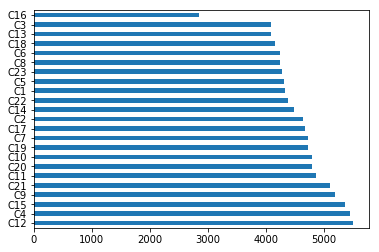

In [7]:
# plot to see how all labels are distributed
train.label.value_counts().plot(kind="barh")

It seems all the labels are equally distributed except "C16". So we may want to make some data augmentation to make up the shortage of this label. For example, we may generate some data with shorter text content from other datapoints which have the same label.

In [8]:
# load the GloVe vectors in a dictionary
embeddings_index = {}
f = open('D:/Master of Data Science/18S2-FIT5149 - Applied Data Analysis/Assignment/glove.42B.300d.txt', encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

1917494it [02:26, 13049.42it/s]


Found 1917494 word vectors.


In [18]:
# this function creates a normalized vector for an entire document
def doc2vec(s):
    words = str(s).lower()#.decode('utf-8')
    words = word_tokenize(words) # tokenize the sentence
    words = [w for w in words if not w in stop_words] # remove stop words
    words = [w for w in words if w.isalpha()] # remove numbers
    
    # create an list of word vectors excluding stopwords
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    
    # if there is an error, create an array with 300 zeros
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    
    return v / np.sqrt((v ** 2).sum())

In [14]:
# split the data into training and validation sets.
xtrain, xvalid, ytrain, yvalid = train_test_split(train.Text.values, train.label, 
                                                  stratify=train.label, random_state=42, 
                                                  test_size=0.5, shuffle=True)

In [19]:
# create sentence vectors using the above function for training and validation set
xtrain_glove = [doc2vec(x) for x in tqdm(xtrain)]
xvalid_glove = [doc2vec(x) for x in tqdm(xvalid)]

100%|███████████████████████████████████████████████████████████████████████████| 52579/52579 [01:33<00:00, 560.83it/s]


In [21]:
# transform into n-dimension arrays
xtrain_glove = np.vstack(xtrain_glove)
xvalid_glove = np.vstack(xvalid_glove)

In [22]:
# just carefully check for error before fitting a model
for item in xtrain_glove:
    if len(item) != 300:
        print(item)

In [23]:
# Fitting a simple SVM
clf = SVC(C=1, kernel="linear")
svmmodel = clf.fit(xtrain_glove, ytrain)

start = time.time()
# predict label
predictions = svmmodel.predict(xvalid_glove)

# model accuracy for X_test
accuracy = clf.score(xvalid_glove, yvalid)
accuracy
end = time.time()

In [26]:
print(accuracy)
end-start

0.7273626352726373


1118.3405575752258

now let's try to fit another model using kernel method

In [ ]:
# Fitting a radial basic function model
clf2 = SVC(C=1, kernel="rbf")
svmmodel2 = clf.fit(xtrain_glove, ytrain)
predictions2 = svmmodel2.predict(xvalid_glove)

# evaluate the accuracy of the new model
accuracy2 = clf2.score(xvalid_glove, yvalid)
accuracy2

In [ ]:
# Fitting a nother type of svm
clf3 = SVC(C=1, kernel="poly", degree=7)
svmmodel3 = clf3.fit(xtrain_glove, ytrain)
predictions3 = svmmodel3.predict(xvalid_glove)

# model accuracy for X_test
accuracy3 = clf3.score(xvalid_glove, yvalid)
accuracy3